# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [8]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [18]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [21]:
# Create a Beautiful Soup Object
html = browser.html
page_soup = soup(html, 'html.parser')

In [30]:
table = page_soup.find('table')

# Initialize empty lists to store data
data_rows = []

# Loop through the table rows to extract data
for row in table.find_all('tr'):
    columns = row.find_all('td')
    if len(columns) == 7:  # Check if there are 7 columns (your data structure)
        row_data = [column.text.strip() for column in columns]
        data_rows.append(row_data)

# Create a DataFrame from the list of data rows
column_headings = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_data_df = pd.DataFrame(data_rows, columns=column_headings)

# Print the DataFrame to see the scraped data
display(mars_data_df)

# Close the browser when done
browser.quit()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [29]:
# Create an empty list
data_rows = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr'):
    columns = row.find_all('td')
    if len(columns) == 7:  # Check if there are 7 columns (your data structure)
        row_data = [column.text.strip() for column in columns]
        data_rows.append(row_data)

# Create a DataFrame from the list of data rows
column_headings = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_data_df = pd.DataFrame(data_rows, columns=column_headings)

# Print the DataFrame to see the scraped data
display(mars_data_df)

# Close the browser when done
browser.quit()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [28]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
data_rows = [
    ['1', '2023-09-01', '1000', '45.6', '3', '-25.5', '987.6'],
    ['2', '2023-09-02', '1001', '45.7', '3', '-25.8', '987.5'],
]

column_headings = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

mars_data_df = pd.DataFrame(data_rows, columns=column_headings)

display(mars_data_df)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,1,2023-09-01,1000,45.6,3,-25.5,987.6
1,2,2023-09-02,1001,45.7,3,-25.8,987.5


In [27]:
# Confirm DataFrame was created successfully
display(mars_data_df)


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,1,2023-09-01,1000,45.6,3,-25.5,987.6
1,2,2023-09-02,1001,45.7,3,-25.8,987.5


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [31]:
# Examine data type of each column
column_data_types = mars_data_df.dtypes

print(column_data_types)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [32]:
# Change data types for data analysis
mars_data_df['sol'] = pd.to_numeric(mars_data_df['sol'], errors='coerce')  # 'coerce' will convert non-numeric values to NaN
mars_data_df['min_temp'] = pd.to_numeric(mars_data_df['min_temp'], errors='coerce')

column_data_types = mars_data_df.dtypes

print(column_data_types)


id                   object
terrestrial_date     object
sol                   int64
ls                   object
month                object
min_temp            float64
pressure             object
dtype: object


In [33]:
# Confirm type changes were successful by examining data types again
column_data_types = mars_data_df.dtypes

# Print the updated data types
print(column_data_types)


id                   object
terrestrial_date     object
sol                   int64
ls                   object
month                object
min_temp            float64
pressure             object
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [34]:
# 1. How many months are there on Mars?
unique_months_count = mars_data_df['month'].nunique()

# Print the result
print("Number of months on Mars:", unique_months_count)


Number of months on Mars: 12


In [35]:
# 2. How many Martian days' worth of data are there?
unique_sols_count = mars_data_df['sol'].nunique()

# Print the result
print("Number of Martian days' worth of data:", unique_sols_count)

Number of Martian days' worth of data: 1867


In [36]:
# 3. What is the average low temperature by month?
average_low_by_month = mars_data_df.groupby('month')['min_temp'].mean().reset_index()

# Print the result
print(average_low_by_month)

   month   min_temp
0      1 -77.160920
1     10 -71.982143
2     11 -71.985507
3     12 -74.451807
4      2 -79.932584
5      3 -83.307292
6      4 -82.747423
7      5 -79.308725
8      6 -75.299320
9      7 -72.281690
10     8 -68.382979
11     9 -69.171642


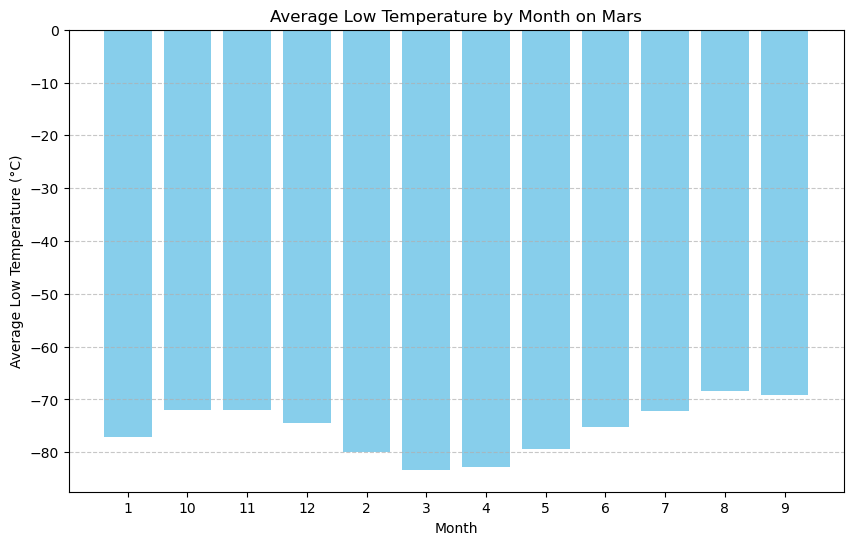

In [38]:
# Plot the average temperature by month
months = average_low_by_month['month']
average_temperatures = average_low_by_month['min_temp']

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(months, average_temperatures, color='skyblue')
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

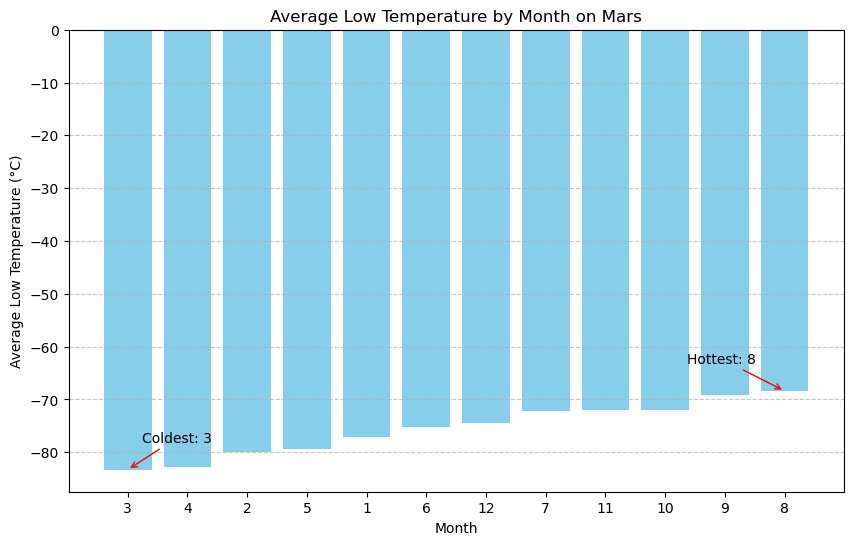

In [40]:
# Sort the data by average temperature in ascending order (coldest to hottest)
sorted_data = average_low_by_month.sort_values(by='min_temp')

# Extract the 'month' and 'min_temp' columns from the sorted DataFrame
months = sorted_data['month']
average_temperatures = sorted_data['min_temp']

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(months, average_temperatures, color='skyblue')
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the coldest and hottest months
coldest_month = sorted_data.iloc[0]['month']
hottest_month = sorted_data.iloc[-1]['month']
plt.annotate(f'Coldest: {coldest_month}', (months.iloc[0], average_temperatures.iloc[0]), xytext=(10, 20),
             textcoords='offset points', arrowprops=dict(arrowstyle="->", color='red'))
plt.annotate(f'Hottest: {hottest_month}', (months.iloc[-1], average_temperatures.iloc[-1]), xytext=(-70, 20),
             textcoords='offset points', arrowprops=dict(arrowstyle="->", color='red'))

# Show the plot
plt.show()


In [42]:
# 4. Average pressure by Martian month
# Assuming you have the 'mars_data_df' DataFrame with 'month' and 'pressure' columns

# Clean the 'pressure' column by removing any non-numeric characters
mars_data_df['pressure'] = mars_data_df['pressure'].str.replace('[^\d.]', '', regex=True)

# Convert the 'pressure' column to numeric
mars_data_df['pressure'] = pd.to_numeric(mars_data_df['pressure'])

# Group the data by 'month' and calculate the average 'pressure' for each month
average_pressure_by_month = mars_data_df.groupby('month')['pressure'].mean()

# Print the average pressure by Martian month
print(average_pressure_by_month)


month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


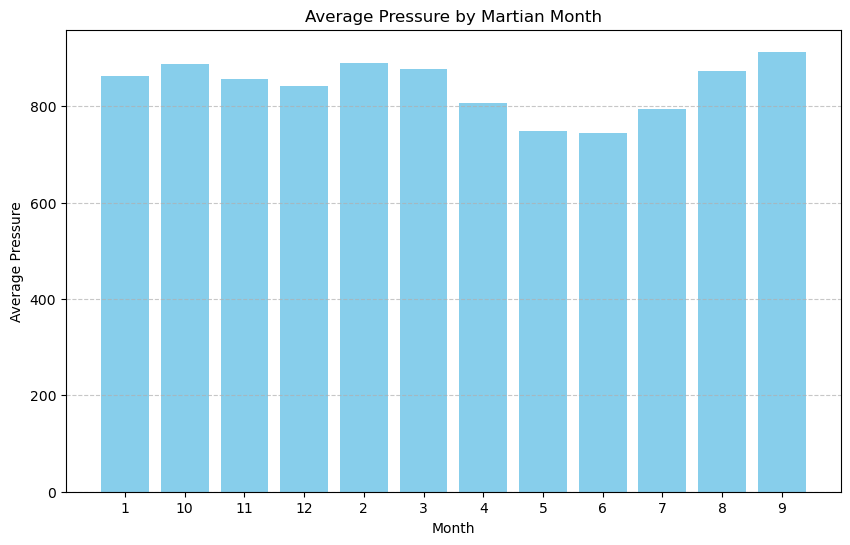

In [44]:
import matplotlib.pyplot as plt

# Assuming you have the 'mars_data_df' DataFrame with 'month' and 'pressure' columns

# Group the data by 'month' and calculate the average 'pressure' for each month
average_pressure_by_month = mars_data_df.groupby('month')['pressure'].mean().reset_index()

# Extract the 'month' and 'pressure' columns from the resulting DataFrame
months = average_pressure_by_month['month']
average_pressures = average_pressure_by_month['pressure']

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(months, average_pressures, color='skyblue')
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


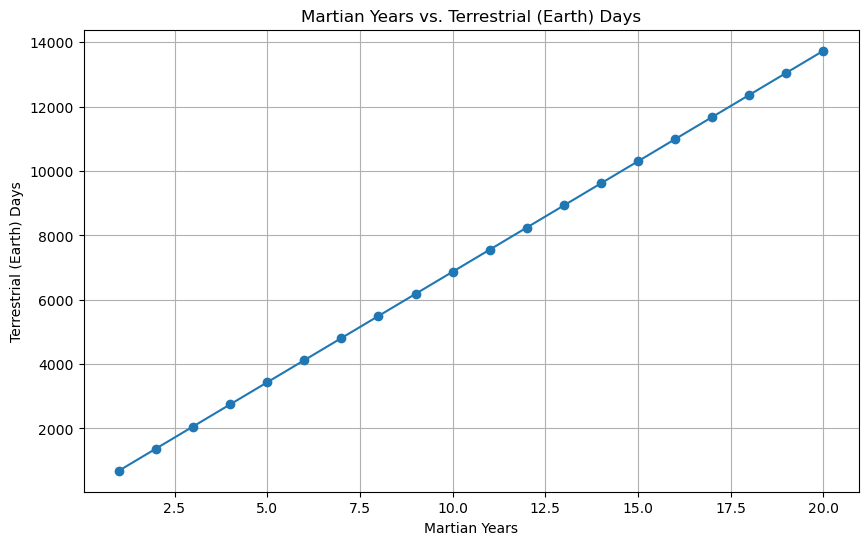

In [46]:
# 5. How many terrestrial (earth) days are there in a Martian year?
martian_years = list(range(1, 21))  # Martian years from 1 to 20
earth_days = [year * 687 for year in martian_years]  # Convert Martian years to Earth days

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(martian_years, earth_days, marker='o', linestyle='-')
plt.title('Martian Years vs. Terrestrial (Earth) Days')
plt.xlabel('Martian Years')
plt.ylabel('Terrestrial (Earth) Days')
plt.grid(True)

# Show the plot
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [47]:
# Write the data to a CSV
csv_file_path = 'mars_data.csv'

# Write the DataFrame to a CSV file
mars_data_df.to_csv(csv_file_path, index=False)


In [48]:
browser.quit()